### Cisco - Ariel University API Security Detection Challenge 2023
## Dataset 3


### Imports and global settings

In [62]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 3 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./datasets/dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Show the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.Attack_Tag,response.headers.Location,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie
0,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,GET,http://127.0.0.1:5000/bookstore/signup?usernam...,,400 BAD REQUEST,application/json,76,400,"{""message"": ""This username is already taken, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...,,302 FOUND,text/html; charset=utf-8,199,302,text/html; charset=utf-8,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=N6BKSYvbHZ-c7Nvn6ITB2Q7yJddttJSdw-LNw7PIJ...,"Thu, 15 Dec 2022 00:25:51 GMT",XSS,/forum,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/about/greet?resource_id=...,,200 OK,text/html; charset=utf-8,546,200,text/html; charset=utf-8,de-CH,none,websocket,?1,document,['ck=W8ONnD95GriBOMxq2rHpMUXFIHT5bKv0QPZiOea0E...,"Thu, 15 Dec 2022 00:20:24 GMT",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/orders/get/ship_via/3,,200 OK,application/json,343,200,"{""customer_id"": ""VINET"", ""employee_id"": ""5"", ""...","en-US,en;q=0.5",none,same-origin,?1,document,['ck=ms3dG65An9Vqx-2x--24w_j8ro90Bpp9gqZJVM03I...,"Thu, 15 Dec 2022 00:33:30 GMT",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/about/greet?resource_id=...,,200 OK,text/html; charset=utf-8,376,200,text/html; charset=utf-8,de,none,same-origin,?1,document,['ck=7mBcmslAl5Fpg5jiXWtM8qSZUhGIwFLP1sBYSUMvk...,"Thu, 15 Dec 2022 00:42:19 GMT",NaN,NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [63]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,response.headers.Location,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,GET,http://127.0.0.1:5000/bookstore/signup?usernam...,,400 BAD REQUEST,application/json,76,400,"{""message"": ""This username is already taken, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...,,302 FOUND,text/html; charset=utf-8,199,302,text/html; charset=utf-8,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=N6BKSYvbHZ-c7Nvn6ITB2Q7yJddttJSdw-LNw7PIJ...,"Thu, 15 Dec 2022 00:25:51 GMT",/forum,NaN,NaN,NaN,XSS,Malware
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/about/greet?resource_id=...,,200 OK,text/html; charset=utf-8,546,200,text/html; charset=utf-8,de-CH,none,websocket,?1,document,['ck=W8ONnD95GriBOMxq2rHpMUXFIHT5bKv0QPZiOea0E...,"Thu, 15 Dec 2022 00:20:24 GMT",NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/orders/get/ship_via/3,,200 OK,application/json,343,200,"{""customer_id"": ""VINET"", ""employee_id"": ""5"", ""...","en-US,en;q=0.5",none,same-origin,?1,document,['ck=ms3dG65An9Vqx-2x--24w_j8ro90Bpp9gqZJVM03I...,"Thu, 15 Dec 2022 00:33:30 GMT",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/about/greet?resource_id=...,,200 OK,text/html; charset=utf-8,376,200,text/html; charset=utf-8,de,none,same-origin,?1,document,['ck=7mBcmslAl5Fpg5jiXWtM8qSZUhGIwFLP1sBYSUMvk...,"Thu, 15 Dec 2022 00:42:19 GMT",NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144495,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,GET,http://127.0.0.1:5000/bookstore/signup?usernam...,,400 BAD REQUEST,application/json,76,400,"{""message"": ""This username is already taken, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Benign
144496,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/states/Amy?id=8408766.17...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}","en-US,en;q=0.5",none,websocket,?1,document,['ck=K4ze3MQyPwZr2g11VWiL5jcP0qX0YiAjD8dqbdZ5E...,"Thu, 15 Dec 2022 00:49:52 GMT",NaN,NaN,NaN,NaN,Benign,Benign
144497,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/orders/get/country?count...,,404 NOT FOUND,application/json,46,404,"{""error"": ""No records found for this country""}",de-CH,none,same-origin,?1,document,['ck=jqYAfZFYqgBNw_4OUCwMxCZI6-YknUzwkz5bFsl-I...,"Thu, 15 Dec 2022 00:34:55 GMT",NaN,NaN,NaN,NaN,Benign,Benign
144498,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,GET,http://127.0.0.1:5000/orders/check/exists?val=...,,401 UNAUTHORIZED,application/json,41,401,"{""error"": ""Not a number failed to parse""}",de,none,websocket,?1,document,['ck=gWjT0HHHjI_M7uyswSILxgBtoW2OZ7ztEzHgZxGDg...,"Thu, 15 Dec 2022 00:33:41 GMT",NaN,NaN,NaN,NaN,Benign,Benign


# Unique values
We ran the Counter function on all of the features to see how many unique values there are in each column.

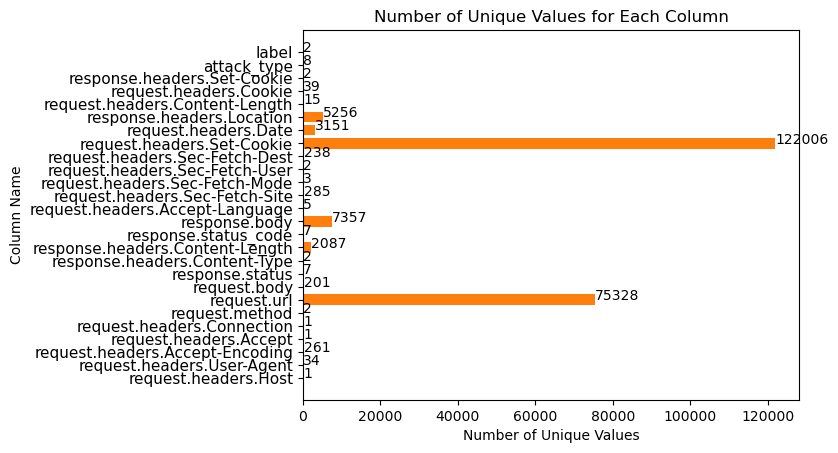

In [3]:
column_names = df.columns
num_unique_values = []

# Loop through the column names and get the number of unique values for each column
for column in column_names:
  num_unique_values.append(len(Counter(df[column])))

plt.yticks(range(len(column_names)), column_names, fontsize=11)

plt.barh(range(len(column_names)), num_unique_values)

for i, v in enumerate(num_unique_values):
    plt.text(v + 0.5, i, str(v), color='black')

plt.barh(range(len(column_names)), num_unique_values)
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Name')
plt.title('Number of Unique Values for Each Column')
plt.show()

## Checking for nan values % in all the columns

In [25]:
for column in df.columns[df.isna().any()].tolist():
    percent_missing = df[column].isnull().sum() / len(df)
    print(f"Percentage of missing values in {column}: {percent_missing:.2%}")

Percentage of missing values in request.headers.Accept-Language: 10.54%
Percentage of missing values in request.headers.Sec-Fetch-Site: 10.54%
Percentage of missing values in request.headers.Sec-Fetch-Mode: 10.54%
Percentage of missing values in request.headers.Sec-Fetch-User: 10.54%
Percentage of missing values in request.headers.Sec-Fetch-Dest: 10.54%
Percentage of missing values in request.headers.Set-Cookie: 10.54%
Percentage of missing values in request.headers.Date: 10.54%
Percentage of missing values in response.headers.Location: 94.08%
Percentage of missing values in request.headers.Content-Length: 95.28%
Percentage of missing values in request.headers.Cookie: 97.76%
Percentage of missing values in response.headers.Set-Cookie: 98.88%


## 1 Unique value features
As we can see from the plot above there a number of columns that only have 1 value in all of rows,
which means it doesn't affect the model so we will delete them later.

In [26]:
columns_to_check = ['request.headers.Connection',
                     'request.headers.Accept',
                     'request.headers.Host',]

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: request.headers.Connection, Value: keep-alive, Count: 144500
Column: request.headers.Accept, Value: */*, Count: 144500
Column: request.headers.Host, Value: 127.0.0.1:5000, Count: 144500


## 2 Unique value features

In [79]:
columns_to_check = ['response.headers.Set-Cookie',                
                    'response.headers.Content-Type',
                    'request.method',
                    'request.headers.Sec-Fetch-User',
                   ]

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: response.headers.Set-Cookie, Value: nan, Count: 142883
Column: response.headers.Set-Cookie, Value: username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/, Count: 1617
Column: response.headers.Content-Type, Value: application/json, Count: 99753
Column: response.headers.Content-Type, Value: text/html; charset=utf-8, Count: 44747
Column: request.method, Value: GET, Count: 137677
Column: request.method, Value: POST, Count: 6823
Column: request.headers.Sec-Fetch-User, Value: ?1, Count: 129272
Column: request.headers.Sec-Fetch-User, Value: nan, Count: 15228


## response.headers.Set-Cookie

In [80]:
df_filtered = df.loc[df['response.headers.Set-Cookie'] == 'username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1617})

## response.headers.Content-Type

In [81]:
df_filtered = df.loc[df['response.headers.Content-Type'] == 'application/json']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 92302, 'Malware': 7451})

In [71]:
df_filtered = df.loc[df['response.headers.Content-Type'] == 'text/html; charset=utf-8']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 8665, 'Benign': 36082})

## request.method

In [82]:
df_filtered = df.loc[df['request.method'] == 'POST']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 5206, 'Malware': 1617})

## request.headers.Sec-Fetch-User

In [83]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-User'] == '?1']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 16116, 'Benign': 113156})

## request.headers.Sec-Fetch-Mode
3 Unique value features

In [85]:
df['request.headers.Sec-Fetch-Mode'] = df['request.headers.Sec-Fetch-Mode'].fillna('none')
counter = Counter(df['request.headers.Sec-Fetch-Mode'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Sec-Fetch-Mode'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: websocket, Label: Benign, Count: 56756
Value: websocket, Label: Malware, Count: 8134
Value: same-origin, Label: Benign, Count: 56400
Value: same-origin, Label: Malware, Count: 7982
Value: none, Label: Benign, Count: 15228


## response.status and response.status_code
In those two features it seems that they both contain the same data.

We will check that and delete one of the features in case they are both identical.

In [89]:
print("response.status")
counter1 = Counter(df['response.status'])
for value, count in counter1.most_common():
      print(f"Value: {value}, Count: {count}")
print()
print("response.status_code")
counter2 = Counter(df['response.status_code'])
for value, count in counter2.most_common():
      print(f"Value: {value}, Count: {count}")

response.status
Value: 200 OK, Count: 86317
Value: 404 NOT FOUND, Count: 20641
Value: 401 UNAUTHORIZED, Count: 13607
Value: 400 BAD REQUEST, Count: 10265
Value: 308 PERMANENT REDIRECT, Count: 5253
Value: 500 INTERNAL SERVER ERROR, Count: 5121
Value: 302 FOUND, Count: 3296

response.status_code
Value: 200, Count: 86317
Value: 404, Count: 20641
Value: 401, Count: 13607
Value: 400, Count: 10265
Value: 308, Count: 5253
Value: 500, Count: 5121
Value: 302, Count: 3296


In [93]:
# replacing all the values in the response.status column to match the values in the response.status_code column

df['response.status'] = df['response.status'].replace({
  '200 OK': '200',
  '404 NOT FOUND': '404',
  '401 UNAUTHORIZED': '401',
  '400 BAD REQUEST' : '400',
  '302 FOUND' : '302',
  '308 PERMANENT REDIRECT' : '308',
  '500 INTERNAL SERVER ERROR' : '500'
})

# the response.status_code is int so we will change it to string

df['response.status'] = df['response.status'].astype(int)

# checking if the columns are equal

are_equal = df['response.status'].eq(df['response.status_code']).all()
if are_equal:
  print("The values in 'response.status' are equal to the values in 'response.status_code'.")
else:
  print("The values in 'response.status' are not equal to the values in 'response.status_code'.")


The values in 'response.status' are equal to the values in 'response.status_code'.


In [73]:
counter = Counter(df['response.status_code'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['response.status_code'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: 200, Label: Benign, Count: 77308
Value: 200, Label: Malware, Count: 9009
Value: 404, Label: Benign, Count: 20353
Value: 404, Label: Malware, Count: 288
Value: 401, Label: Benign, Count: 10231
Value: 401, Label: Malware, Count: 3376
Value: 400, Label: Benign, Count: 10193
Value: 400, Label: Malware, Count: 72
Value: 308, Label: Benign, Count: 5179
Value: 308, Label: Malware, Count: 74
Value: 500, Label: Benign, Count: 5120
Value: 500, Label: Malware, Count: 1
Value: 302, Label: Malware, Count: 3296


All the traffic that has status code of 302 is labeled as Malware, the rest can be both

## request.body

In [77]:
df['request.body'] = df['request.body'].fillna('none')
counter = Counter(df['request.body'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.body'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: , Label: Benign, Count: 123178
Value: , Label: Malware, Count: 16116
Value: SusanGioe, Label: Benign, Count: 40
Value: BerryShackett, Label: Benign, Count: 39
Value: JuanitaGarcia, Label: Benign, Count: 38
Value: PetraOwens, Label: Benign, Count: 37
Value: MaryHulsey, Label: Benign, Count: 37
Value: FrankStukel, Label: Benign, Count: 36
Value: PearlNielsen, Label: Benign, Count: 36
Value: GaryChagoya, Label: Benign, Count: 36
Value: LuisMchattie, Label: Benign, Count: 35
Value: VanOrtiz, Label: Benign, Count: 35
Value: EvelynStamm, Label: Benign, Count: 35
Value: HerlindaSherman, Label: Benign, Count: 34
Value: AmosDavis, Label: Benign, Count: 34
Value: DanielSmith, Label: Benign, Count: 34
Value: AndrewHiggins, Label: Benign, Count: 34
Value: ShanekaRiffel, Label: Benign, Count: 34
Value: PeterKilpatrick, Label: Benign, Count: 33
Value: NathanFinn, Label: Benign, Count: 33
Value: DonGorton, Label: Benign, Count: 33
Value: ChristinePopovich, Label: Benign, Count: 33
Value: Dwayn

Value: MariaBerman, Label: Benign, Count: 20
Value: GaryRobinson, Label: Benign, Count: 20
Value: TanyaMiller, Label: Benign, Count: 20
Value: BruceWood, Label: Benign, Count: 20
Value: EdgarNelson, Label: Benign, Count: 20
Value: BryanShumaker, Label: Benign, Count: 20
Value: ChristopherRivera, Label: Benign, Count: 19
Value: GregorySiefkes, Label: Benign, Count: 19
Value: JoeFields, Label: Benign, Count: 19
Value: BeckyPoirier, Label: Benign, Count: 19
Value: TyrellNielson, Label: Benign, Count: 19
Value: RobertPenderel, Label: Benign, Count: 19
Value: KyleKubiak, Label: Benign, Count: 19
Value: ElmerSimpson, Label: Benign, Count: 19
Value: JasonDavis, Label: Benign, Count: 19
Value: JohnMccurdy, Label: Benign, Count: 19
Value: CassandraGreene, Label: Benign, Count: 19
Value: NoraGeorge, Label: Benign, Count: 18
Value: ThomasHawkin, Label: Benign, Count: 17
Value: AlvaroDobiesz, Label: Benign, Count: 17
Value: LisaLyons, Label: Benign, Count: 17
Value: MistyAdkins, Label: Benign, Cou

From the entire list of 'request.body' the only value that has Malware labels is ',' but he also has Benign labels.

## request.headers.Content-Length

In [76]:
df['request.headers.Content-Length'] = df['request.headers.Content-Length'].fillna('none')
counter = Counter(df['request.headers.Content-Length'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Content-Length'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: none, Label: Benign, Count: 123178
Value: none, Label: Malware, Count: 14499
Value: 0, Label: Malware, Count: 1617
Value: 11, Label: Benign, Count: 924
Value: 13, Label: Benign, Count: 901
Value: 12, Label: Benign, Count: 900
Value: 10, Label: Benign, Count: 640
Value: 15, Label: Benign, Count: 543
Value: 14, Label: Benign, Count: 425
Value: 9, Label: Benign, Count: 390
Value: 8, Label: Benign, Count: 194
Value: 17, Label: Benign, Count: 108
Value: 16, Label: Benign, Count: 102
Value: 18, Label: Benign, Count: 29
Value: 19, Label: Benign, Count: 25
Value: 20, Label: Benign, Count: 25


All the values that are '0' are labeled as "Malware" for sure.
The rest are 'none' so we can't say more about them.

## response.headers.Location

In [94]:
df['response.headers.Location'] = df['response.headers.Location'].fillna('none')
counter = Counter(df['response.headers.Location'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 135951
Value: /forum, Count: 1679
Value: /cookielogin, Count: 1617
Value: http://127.0.0.1:5000/post/new/?object_id=1i40SdJKbC__spaYvUDM9wIfCWmEUK7mB6qY6HLu9Ws&res=1080p, Count: 1
Value: http://127.0.0.1:5000/post/new/?id=1349583.7954693816&resource_id=YZ5Wj3PA_fZWcpLPfC4mBiwVAAsf4FMzjd14vO7B3Qw&res=640x360, Count: 1
Value: http://127.0.0.1:5000/post/new/?file_id=5TDn2F5uMlJCkxGsKbolLHFiTHsPGHGkANZV8X2HfvU&screen=3840x2160, Count: 1
Value: http://127.0.0.1:5000/post/new/?id=847354.2646348892, Count: 1
Value: http://127.0.0.1:5000/post/new/?id=694429.1755704507&res_id=gT3nECm0XJHJtmHFj87IuFJ3O86ac7uleDaAbFh3cwE, Count: 1
Value: http://127.0.0.1:5000/post/new/?res_id=SYljGQL6kmUx4Xw4WIJ2e3U3IYGAmpbW-8Fjt5YY4o4, Count: 1
Value: http://127.0.0.1:5000/post/new/?id=995833.2197281526&resource=Mee5AkD0Ya2jOSfPNkDQYeXP84Int-Gn_3f_3eptYJM, Count: 1
Value: http://127.0.0.1:5000/post/new/?res_id=Ki_Z_pETInhp2_twyK3Sg8lwVbG6NENcZiSVLL-DBbw, Count: 1
Value: http://127.0.0.1:5000/

In [95]:
df_filtered = df.loc[df['response.headers.Location'] == '/cookielogin']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1617})

In [99]:
df_filtered = df.loc[df['response.headers.Location'] == '/forum']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1679})

In [98]:
df_filtered = df.loc[df['response.headers.Location'].str.contains('http://127.0.0.1:5000/post/new/')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 5179, 'Malware': 74})

## request.headers.Accept-Language
Here we checked the values in the 'request.headers.Accept-Language' feature but didn't come up with something conclusive

In [100]:
df['request.headers.Accept-Language'] = df['request.headers.Accept-Language'].fillna('none')
counter = Counter(df['request.headers.Accept-Language'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Accept-Language'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: en-US,en;q=0.5, Label: Benign, Count: 28466
Value: en-US,en;q=0.5, Label: Malware, Count: 4064
Value: en-US,en;q=0.9,he;q=0.8, Label: Benign, Count: 28234
Value: en-US,en;q=0.9,he;q=0.8, Label: Malware, Count: 4076
Value: de-CH, Label: Benign, Count: 28214
Value: de-CH, Label: Malware, Count: 4003
Value: de, Label: Benign, Count: 28242
Value: de, Label: Malware, Count: 3973
Value: none, Label: Benign, Count: 15228


## 'response.headers.Content-Length'

In [101]:
counter = Counter(df['response.headers.Content-Length'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['response.headers.Content-Length'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: 26, Label: Benign, Count: 10527
Value: 26, Label: Malware, Count: 2005
Value: 41, Label: Benign, Count: 10600
Value: 41, Label: Malware, Count: 1726
Value: 34, Label: Benign, Count: 7198
Value: 34, Label: Malware, Count: 83
Value: 31, Label: Benign, Count: 6665
Value: 31, Label: Malware, Count: 97
Value: 70, Label: Benign, Count: 5295
Value: 70, Label: Malware, Count: 195
Value: 871, Label: Benign, Count: 5253
Value: 871, Label: Malware, Count: 79
Value: 146, Label: Benign, Count: 5206
Value: 146, Label: Malware, Count: 1
Value: 5546, Label: Benign, Count: 5078
Value: 5546, Label: Malware, Count: 64
Value: 265, Label: Benign, Count: 5120
Value: 265, Label: Malware, Count: 1
Value: 76, Label: Benign, Count: 5039
Value: 46, Label: Benign, Count: 4667
Value: 46, Label: Malware, Count: 92
Value: 28, Label: Benign, Count: 4281
Value: 28, Label: Malware, Count: 49
Value: 38, Label: Benign, Count: 2918
Value: 38, Label: Malware, Count: 35
Value: 20, Label: Benign, Count: 1330
Value: 20

Value: 56, Label: Benign, Count: 180
Value: 56, Label: Malware, Count: 4
Value: 63, Label: Malware, Count: 131
Value: 63, Label: Benign, Count: 46
Value: 69, Label: Malware, Count: 106
Value: 69, Label: Benign, Count: 69
Value: 353, Label: Benign, Count: 171
Value: 353, Label: Malware, Count: 2
Value: 357, Label: Benign, Count: 156
Value: 357, Label: Malware, Count: 4
Value: 61, Label: Malware, Count: 126
Value: 61, Label: Benign, Count: 23
Value: 54, Label: Malware, Count: 140
Value: 54, Label: Benign, Count: 5
Value: 59, Label: Benign, Count: 135
Value: 59, Label: Malware, Count: 8
Value: 91, Label: Benign, Count: 142
Value: 91, Label: Malware, Count: 1
Value: 88, Label: Benign, Count: 139
Value: 88, Label: Malware, Count: 3
Value: 155, Label: Malware, Count: 141
Value: 112, Label: Benign, Count: 135
Value: 112, Label: Malware, Count: 4
Value: 87, Label: Benign, Count: 133
Value: 87, Label: Malware, Count: 2
Value: 411, Label: Benign, Count: 120
Value: 411, Label: Malware, Count: 3
V

Value: 13043, Label: Malware, Count: 4
Value: 1430, Label: Malware, Count: 4
Value: 28620, Label: Malware, Count: 4
Value: 18620, Label: Malware, Count: 4
Value: 29632, Label: Malware, Count: 4
Value: 23091, Label: Malware, Count: 4
Value: 821, Label: Malware, Count: 4
Value: 632, Label: Malware, Count: 4
Value: 1787, Label: Malware, Count: 4
Value: 884, Label: Malware, Count: 4
Value: 26195, Label: Malware, Count: 3
Value: 1262, Label: Malware, Count: 3
Value: 11655, Label: Malware, Count: 3
Value: 22412, Label: Malware, Count: 3
Value: 29968, Label: Malware, Count: 3
Value: 506, Label: Malware, Count: 3
Value: 24820, Label: Malware, Count: 3
Value: 7895, Label: Malware, Count: 3
Value: 3794, Label: Malware, Count: 3
Value: 1724, Label: Malware, Count: 3
Value: 149, Label: Malware, Count: 3
Value: 1871, Label: Malware, Count: 3
Value: 15816, Label: Malware, Count: 3
Value: 33723, Label: Malware, Count: 3
Value: 1997, Label: Malware, Count: 3
Value: 527, Label: Malware, Count: 3
Value:

Value: 968, Label: Malware, Count: 1
Value: 71155, Label: Malware, Count: 1
Value: 18361, Label: Malware, Count: 1
Value: 2641, Label: Malware, Count: 1
Value: 33199, Label: Malware, Count: 1
Value: 3194, Label: Malware, Count: 1
Value: 73174, Label: Malware, Count: 1
Value: 66228, Label: Malware, Count: 1
Value: 63147, Label: Malware, Count: 1
Value: 61488, Label: Malware, Count: 1
Value: 19540, Label: Malware, Count: 1
Value: 44514, Label: Malware, Count: 1
Value: 72349, Label: Malware, Count: 1
Value: 53444, Label: Malware, Count: 1
Value: 51346, Label: Malware, Count: 1
Value: 60771, Label: Malware, Count: 1
Value: 59068, Label: Malware, Count: 1
Value: 76512, Label: Malware, Count: 1
Value: 42510, Label: Malware, Count: 1
Value: 8548, Label: Malware, Count: 1
Value: 8431, Label: Malware, Count: 1
Value: 10710, Label: Malware, Count: 1
Value: 63387, Label: Malware, Count: 1
Value: 10628, Label: Malware, Count: 1
Value: 14958, Label: Malware, Count: 1
Value: 72583, Label: Malware, C

Value: 36608, Label: Malware, Count: 1
Value: 10985, Label: Malware, Count: 1
Value: 52932, Label: Malware, Count: 1
Value: 62790, Label: Malware, Count: 1
Value: 34750, Label: Malware, Count: 1
Value: 48379, Label: Malware, Count: 1
Value: 44675, Label: Malware, Count: 1
Value: 47952, Label: Malware, Count: 1
Value: 76831, Label: Malware, Count: 1
Value: 73446, Label: Malware, Count: 1
Value: 55811, Label: Malware, Count: 1
Value: 37202, Label: Malware, Count: 1
Value: 74660, Label: Malware, Count: 1
Value: 63507, Label: Malware, Count: 1
Value: 67366, Label: Malware, Count: 1
Value: 27022, Label: Malware, Count: 1
Value: 44011, Label: Malware, Count: 1
Value: 15034, Label: Malware, Count: 1
Value: 39479, Label: Malware, Count: 1
Value: 69897, Label: Malware, Count: 1
Value: 58793, Label: Malware, Count: 1
Value: 63027, Label: Malware, Count: 1
Value: 66383, Label: Malware, Count: 1
Value: 75377, Label: Malware, Count: 1
Value: 35853, Label: Malware, Count: 1
Value: 52616, Label: Malw

Value: 49254, Label: Malware, Count: 1
Value: 12521, Label: Malware, Count: 1
Value: 11301, Label: Malware, Count: 1
Value: 16787, Label: Malware, Count: 1
Value: 16468, Label: Malware, Count: 1
Value: 13380, Label: Malware, Count: 1
Value: 49213, Label: Malware, Count: 1
Value: 53093, Label: Malware, Count: 1
Value: 12793, Label: Malware, Count: 1
Value: 30691, Label: Malware, Count: 1
Value: 69581, Label: Malware, Count: 1
Value: 59340, Label: Malware, Count: 1
Value: 53637, Label: Malware, Count: 1
Value: 64645, Label: Malware, Count: 1
Value: 4180, Label: Malware, Count: 1
Value: 13659, Label: Malware, Count: 1
Value: 69938, Label: Malware, Count: 1
Value: 60929, Label: Malware, Count: 1
Value: 33120, Label: Malware, Count: 1
Value: 20090, Label: Malware, Count: 1
Value: 76591, Label: Malware, Count: 1
Value: 44874, Label: Malware, Count: 1
Value: 72984, Label: Malware, Count: 1
Value: 70918, Label: Malware, Count: 1
Value: 6801, Label: Malware, Count: 1
Value: 14996, Label: Malwar

Value: 5675, Label: Malware, Count: 1
Value: 33834, Label: Malware, Count: 1
Value: 26592, Label: Malware, Count: 1
Value: 7117, Label: Malware, Count: 1
Value: 73136, Label: Malware, Count: 1
Value: 7521, Label: Malware, Count: 1
Value: 777, Label: Malware, Count: 1
Value: 44400, Label: Malware, Count: 1
Value: 326, Label: Benign, Count: 1
Value: 72232, Label: Malware, Count: 1
Value: 818, Label: Malware, Count: 1
Value: 71316, Label: Malware, Count: 1
Value: 60572, Label: Malware, Count: 1
Value: 59823, Label: Malware, Count: 1
Value: 18130, Label: Malware, Count: 1
Value: 33635, Label: Malware, Count: 1
Value: 34112, Label: Malware, Count: 1
Value: 38323, Label: Malware, Count: 1
Value: 60098, Label: Malware, Count: 1
Value: 13305, Label: Malware, Count: 1
Value: 75219, Label: Malware, Count: 1
Value: 2401, Label: Malware, Count: 1
Value: 67448, Label: Malware, Count: 1
Value: 4218, Label: Malware, Count: 1
Value: 4888, Label: Malware, Count: 1
Value: 26866, Label: Malware, Count: 1

Value: 5198, Label: Malware, Count: 1
Value: 13226, Label: Malware, Count: 1
Value: 12164, Label: Malware, Count: 1
Value: 198, Label: Malware, Count: 1
Value: 36412, Label: Malware, Count: 1
Value: 15868, Label: Malware, Count: 1
Value: 67720, Label: Malware, Count: 1
Value: 18554, Label: Malware, Count: 1
Value: 16392, Label: Malware, Count: 1
Value: 45942, Label: Malware, Count: 1
Value: 74312, Label: Malware, Count: 1
Value: 27768, Label: Malware, Count: 1
Value: 47797, Label: Malware, Count: 1
Value: 75257, Label: Malware, Count: 1
Value: 9092, Label: Malware, Count: 1
Value: 7316, Label: Malware, Count: 1
Value: 67837, Label: Malware, Count: 1
Value: 71477, Label: Malware, Count: 1
Value: 43060, Label: Malware, Count: 1
Value: 43622, Label: Malware, Count: 1
Value: 65517, Label: Malware, Count: 1
Value: 13466, Label: Malware, Count: 1
Value: 18971, Label: Malware, Count: 1
Value: 16190, Label: Malware, Count: 1
Value: 38718, Label: Malware, Count: 1
Value: 19034, Label: Malware, 

Value: 53251, Label: Malware, Count: 1
Value: 13428, Label: Malware, Count: 1
Value: 364, Label: Benign, Count: 1
Value: 38554, Label: Malware, Count: 1
Value: 9648, Label: Malware, Count: 1
Value: 74815, Label: Malware, Count: 1
Value: 56847, Label: Malware, Count: 1
Value: 52815, Label: Malware, Count: 1
Value: 44321, Label: Malware, Count: 1
Value: 15312, Label: Malware, Count: 1
Value: 40105, Label: Malware, Count: 1
Value: 70017, Label: Malware, Count: 1
Value: 46972, Label: Malware, Count: 1
Value: 53482, Label: Malware, Count: 1
Value: 41960, Label: Malware, Count: 1
Value: 6839, Label: Malware, Count: 1
Value: 65991, Label: Malware, Count: 1
Value: 5397, Label: Malware, Count: 1
Value: 58717, Label: Malware, Count: 1
Value: 19856, Label: Malware, Count: 1
Value: 50559, Label: Malware, Count: 1
Value: 35022, Label: Malware, Count: 1
Value: 64142, Label: Malware, Count: 1
Value: 11064, Label: Malware, Count: 1
Value: 73835, Label: Malware, Count: 1
Value: 4651, Label: Malware, Co

Value: 36137, Label: Malware, Count: 1
Value: 70760, Label: Malware, Count: 1
Value: 17893, Label: Malware, Count: 1
Value: 11456, Label: Malware, Count: 1
Value: 22030, Label: Malware, Count: 1
Value: 40026, Label: Malware, Count: 1
Value: 50600, Label: Malware, Count: 1
Value: 4847, Label: Malware, Count: 1
Value: 40342, Label: Malware, Count: 1
Value: 9528, Label: Malware, Count: 1
Value: 52417, Label: Malware, Count: 1
Value: 31171, Label: Malware, Count: 1
Value: 21910, Label: Malware, Count: 1
Value: 2957, Label: Malware, Count: 1
Value: 32002, Label: Malware, Count: 1
Value: 41047, Label: Malware, Count: 1
Value: 76395, Label: Malware, Count: 1
Value: 46533, Label: Malware, Count: 1
Value: 21313, Label: Malware, Count: 1
Value: 32757, Label: Malware, Count: 1
Value: 8355, Label: Malware, Count: 1
Value: 32918, Label: Malware, Count: 1
Value: 2717, Label: Malware, Count: 1
Value: 12635, Label: Malware, Count: 1
Value: 13387, Label: Malware, Count: 1
Value: 26472, Label: Malware, 

Value: 50284, Label: Malware, Count: 1
Value: 7834, Label: Malware, Count: 1
Value: 859, Label: Malware, Count: 1
Value: 35262, Label: Malware, Count: 1
Value: 25562, Label: Malware, Count: 1
Value: 31212, Label: Malware, Count: 1
Value: 20169, Label: Malware, Count: 1
Value: 4338, Label: Malware, Count: 1
Value: 2878, Label: Malware, Count: 1
Value: 41243, Label: Malware, Count: 1
Value: 11263, Label: Malware, Count: 1
Value: 32043, Label: Malware, Count: 1
Value: 77036, Label: Malware, Count: 1
Value: 27259, Label: Malware, Count: 1
Value: 41726, Label: Malware, Count: 1
Value: 12480, Label: Malware, Count: 1
Value: 40538, Label: Malware, Count: 1
Value: 13065, Label: Malware, Count: 1
Value: 25366, Label: Malware, Count: 1
Value: 26984, Label: Malware, Count: 1
Value: 7641, Label: Malware, Count: 1


There are certain values that are only labeled as "Malware" 

## request.headers.Accept-Encoding

In [102]:
counter = Counter(df['request.headers.Accept-Encoding'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: gzip, deflate, br, Count: 128999
Value: gzip, deflate, Count: 15228
Value: gzip, deflate, br${jndi:ldapdallasnews.com/sports/college-sports/headlines/20101204-big-12-championship-game-history-can_t-rival-this.ece}, Count: 2
Value: gzip, deflate, br${jndi:ldapfinance.boston.com/boston/news/read?GUID=12361213}, Count: 2
Value: gzip, deflate, br${jndi:ldapjokes.com/funny/chelsea%2Bperetti/chelsea-peretti--i-heart-nerds}, Count: 2
Value: gzip, deflate, br${jndi:ldaphttp://westwindwebdesign.com/component/content/article/3-news/37-do-you-really-need-a-website.html}, Count: 2
Value: gzip, deflate, br${jndi:ldapanswers.com/topic/joe-hill-film-1}, Count: 2
Value: gzip, deflate, br${jndi:ldapapple.identityverificaition.com}, Count: 2
Value: gzip, deflate, br${jndi:ldaphawkeyes.pedia.com/}, Count: 2
Value: gzip, deflate, br${jndi:ldaphttp://elitedaily.com/dating/5-things-consider-taking-next-step-relationship/975986/}, Count: 2
Value: gzip, deflate, br${jndi:ldaprasmussenreports.com/public

Here we can see most of the values are 'gzip, deflate, br' but there are other values that seem suspicious so we will check if they mean something.

In [106]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate, br']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 15843, 'Benign': 113156})

In [107]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 15228})

In [103]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 273})

As we can see, all the values that did contain 'jndi:ldap' are labeled as "Malware"

## request.headers.Cookie

In [108]:
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: nan, Count: 141256
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J01hcnZpbicpKVstMV2UhZRSlC4=; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=, Count: 181
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J01hcnZpbicpKVstMV2UhZRSlC4=, Count: 174
Value: username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIysKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlc

In [110]:
# most of the data in this column is nan so we will fill it up with 'None' so we can filter out the unique values
df['request.headers.Cookie'] = df['request.headers.Cookie'].fillna('none')
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 3244})

As we can see above, all the values that weren't nan and contained some kind of string that contains 'username=' are labeled as "Malware"

## request.headers.Sec-Fetch-Site

In [112]:
df['request.headers.Sec-Fetch-Site'] = df['request.headers.Sec-Fetch-Site'].fillna('none')
counter = Counter(df['request.headers.Sec-Fetch-Site'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 144206
Value: none${jndi:ldapabdcards.com/cards/star-hockey-player-cards/hkthbaut.htm}, Count: 2
Value: none${jndi:ldapboardgamecapital.com/board-game-rules.htm}, Count: 2
Value: none${jndi:ldapcameraobscur4.tumblr.com/}, Count: 2
Value: none${jndi:ldapmilana-deti.ru}, Count: 2
Value: none${jndi:ldapstart.cortera.com/company/research/k3n1qzk6n/john-w-blankenship-construction-inc/}, Count: 2
Value: none${jndi:ldaplastbit.com/ntpsw/}, Count: 2
Value: none${jndi:ldappeoplewearingaviators.com/}, Count: 2
Value: none${jndi:ldapcduniverse.com/productinfo.asp?pid=1026783}, Count: 2
Value: none${jndi:ldapen.wikipedia.org/wiki/2009%E2%80%9310_California_Golden_Bears_women%27s_basketball_team}, Count: 2
Value: none${jndi:ldaphttp://www.unfallhilfe-bayern.de/index.php/component/mailto/index.html?tmpl=component&link=aHR0cDovL3d3dy51bmZhbGxoaWxmZS1iYXllcm4uZGUvaW5kZXgucGhwL2NvbXBvbmVudC9jb250ZW50L2FydGljbGUvMS1ha3R1ZWxsZS1uYWNocmljaHRlbi80NS1qb29tbGEtY29tbXVuaXR5LXBvcnRhbA==}, C

In [113]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 294})

All the values in this feature that aren't none and contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Sec-Fetch-Dest'

In [115]:
df['request.headers.Sec-Fetch-Dest'] = df['request.headers.Sec-Fetch-Dest'].fillna('none')
counter = Counter(df['request.headers.Sec-Fetch-Dest'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: document, Count: 129023
Value: none, Count: 15228
Value: document${jndi:ldaplennar.com/New-Homes/Florida/Orlando}, Count: 2
Value: document${jndi:ldapextreme-underground.blogspot.com/2008/03/angelcorpse-of-lucifer-and-lightning.html}, Count: 2
Value: document${jndi:ldapen.wikipedia.org/wiki/Ch%C3%A9rie_Carter-Scott}, Count: 2
Value: document${jndi:ldapyasni.co.uk/james+cochrane/check+people}, Count: 2
Value: document${jndi:ldaphttp://coratradecenter.ro/conditii-de-utilizare}, Count: 2
Value: document${jndi:ldapadmintl-paypal.com}, Count: 2
Value: document${jndi:ldapin.gov/h84/}, Count: 2
Value: document${jndi:ldapviarail.ca/garden/en_jardins.html}, Count: 2
Value: document${jndi:ldaphotnsexycelebrities.blogspot.com/}, Count: 2
Value: document${jndi:ldapitunes.apple.com/us/album/mad-hatter-rap/id386456225}, Count: 2
Value: document${jndi:ldapfacebook.com/pages/RCI-Martinique/121981591179457}, Count: 2
Value: document${jndi:ldapprowrestlinghistory.com/supercards/usa/wcw/s-brawl.ht

In [116]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 249})

All the values in this feature that aren't document contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Cookie'

In [117]:
df['request.headers.Cookie'] = df['request.headers.Cookie'].fillna('none')
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 141256
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J01hcnZpbicpKVstMV2UhZRSlC4=; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=, Count: 181
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J01hcnZpbicpKVstMV2UhZRSlC4=, Count: 174
Value: username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIysKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNl

In [118]:
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 3244})

All the values in this feature that aren't none and contain "username=", are labeled as "Malware"

## 'request.headers.User-Agent'

In [119]:
df['request.headers.User-Agent'] = df['request.headers.User-Agent'].fillna('none')
counter = Counter(df['request.headers.User-Agent'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: python-requests/2.28.1, Count: 15228
Value: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Count: 4077
Value: Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko/20100101 Firefox/28.0, Count: 4014
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36, Count: 4009
Value: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36, Count: 4000
Value: Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36, Count: 3988
Value: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24.0) Gecko/20100101 Firefox/24.0, Count: 3984
Value: Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36, Count: 3983
Value: Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25.0) Gecko/20100101 Firefox/29.0, Count: 3975
Value: Mozilla/5.0 (Windows NT 10.0) A

In [120]:
counter = Counter(df['request.headers.User-Agent'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.User-Agent'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: python-requests/2.28.1, Label: Benign, Count: 15228
Value: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Label: Benign, Count: 3570
Value: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Label: Malware, Count: 507
Value: Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko/20100101 Firefox/28.0, Label: Benign, Count: 3497
Value: Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko/20100101 Firefox/28.0, Label: Malware, Count: 517
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36, Label: Benign, Count: 3508
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36, Label: Malware, Count: 501
Value: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36, Label: Benign, Count: 3498
Value:

## 'response.body'

In [121]:
counter = Counter(df['response.body'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



doesn't run   ¯\\_(ツ)_/¯

In [115]:
# Encoding the features that we saw that had certain values the indicated "Malware"

# 'request.headers.Accept-Encoding' - 0 if gzip, deflate, br, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Site' - 0 if none, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Dest' - 0 if document, 1 if contains jndi:ldap
# 'response.headers.Set-Cookie' - 0 if none, 1 if username=
# 'request.headers.Content-Length' - 0 if 0, 1 otherwise
# 'response.headers.Location' - 0 if none, 1 if '/cookielogin', 2 if 'http://127.0.0.1:5000/post/new/'
# 'request.headers.Cookie' - 0 if none, 1 if username=

In [64]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer


# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['response.headers.Content-Type',
                'request.headers.Sec-Fetch-Mode',   
                'request.headers.Accept-Language',  
                'request.method',
                  

                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = [ 'request.headers.User-Agent', ##
                    'request.headers.Set-Cookie', ##
                    'request.url', ##                                      
                    'response.body', ##  
                   
                   #'response.headers.Set-Cookie',
                   'response.headers.Location',
                             
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'request.headers.Accept',
                    'request.headers.Host',
                    'request.headers.Connection',  
                    'response.status',
                    'request.headers.Sec-Fetch-User',
                    'request.headers.Date',
                     
                    'request.headers.Content-Length',
                    'response.headers.Set-Cookie',
                    ]

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
        df[column] = df[column].fillna('none')

    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=2)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # 'request.headers.Accept-Encoding'
    df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap'), 'request.headers.Accept-Encoding'] = 1
    df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate, br', 'request.headers.Accept-Encoding'] = 0
    df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate', 'request.headers.Accept-Encoding'] = -1
    df['request.headers.Accept-Encoding'] = df['request.headers.Accept-Encoding'].astype(float)

    # 'request.headers.Sec-Fetch-Site'
    df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Site'] = 1
    df.loc[df['request.headers.Sec-Fetch-Site'] == 'none', 'request.headers.Sec-Fetch-Site'] = 0
    df['request.headers.Sec-Fetch-Site'] = df['request.headers.Sec-Fetch-Site'].astype(float)

    # 'request.headers.Sec-Fetch-Dest'
    df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Dest'] = 1
    df.loc[df['request.headers.Sec-Fetch-Dest'] == 'document', 'request.headers.Sec-Fetch-Dest'] = 0
    df.loc[df['request.headers.Sec-Fetch-Dest'] == 'none', 'request.headers.Sec-Fetch-Dest'] = 0
    df['request.headers.Sec-Fetch-Dest'] = df['request.headers.Sec-Fetch-Dest'].astype(float)
    
    # 'request.headers.Cookie'
    df.loc[df['request.headers.Cookie'].str.contains('username='), 'request.headers.Cookie'] = 1
    df.loc[df['request.headers.Cookie'] == 'none', 'request.headers.Cookie'] = 0.5
    df['request.headers.Cookie'] = df['request.headers.Cookie'].astype(float)

#     # 'response.headers.Set-Cookie'
#     df.loc[df['response.headers.Set-Cookie'].str.contains('username='), 'response.headers.Set-Cookie'] = 1
#     df.loc[df['response.headers.Set-Cookie'] == 'none', 'response.headers.Set-Cookie'] = 0.5
#     df['response.headers.Set-Cookie'] = df['response.headers.Set-Cookie'].astype(float)

#     # 'response.headers.Location'
#     df.loc[df['response.headers.Location'] == 'http://127.0.0.1:5000/post/new/', 'response.headers.Location'] = 0.3
#     df.loc[df['response.headers.Location'] == '/cookielogin', 'response.headers.Location'] = 1
#     df.loc[df['response.headers.Location'] == 'none', 'response.headers.Location'] = 0
#     df['response.headers.Location'] = df['response.headers.Location'].astype(float)

#     # 'request.headers.Content-Length'
#     df.loc[df['request.headers.Content-Length'] == '0', 'request.headers.Content-Length'] = 1
#     df.loc[df['request.headers.Content-Length'] == 'none', 'request.headers.Content-Length'] = 0
#     df['request.headers.Content-Length'] = df['request.headers.Content-Length'].astype(float)



    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.User-Agent,request.headers.Accept-Encoding,request.method,request.url,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,response.headers.Location,request.headers.Cookie,attack_type,label
0,0.000000,-1.0,0,0.970143,0,76,400,0.948683,4,0.0,0,0.0,-1.000000,-1.0,0.5,Benign,Benign
1,0.832050,0.0,0,0.992278,1,199,302,-1.000000,3,0.0,1,0.0,-0.514496,0.0,0.5,XSS,Malware
2,-0.948683,0.0,0,1.000000,1,546,200,-1.000000,1,0.0,2,0.0,-0.600000,-1.0,0.5,Benign,Benign
3,1.000000,0.0,0,0.707107,0,343,200,0.650791,2,0.0,1,0.0,-0.242536,-1.0,0.5,Benign,Benign
4,1.000000,0.0,0,0.000000,1,376,200,-1.000000,0,0.0,1,0.0,-0.768221,-1.0,0.5,Benign,Benign


In [65]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144500 entries, 0 to 144499
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.User-Agent       144500 non-null  float64
 1   request.headers.Accept-Encoding  144500 non-null  float64
 2   request.method                   144500 non-null  int32  
 3   request.url                      144500 non-null  float64
 4   response.headers.Content-Type    144500 non-null  int32  
 5   response.headers.Content-Length  144500 non-null  object 
 6   response.status_code             144500 non-null  int64  
 7   response.body                    144500 non-null  float64
 8   request.headers.Accept-Language  144500 non-null  int32  
 9   request.headers.Sec-Fetch-Site   144500 non-null  float64
 10  request.headers.Sec-Fetch-Mode   144500 non-null  int32  
 11  request.headers.Sec-Fetch-Dest   144500 non-null  float64
 12  re

<AxesSubplot:>

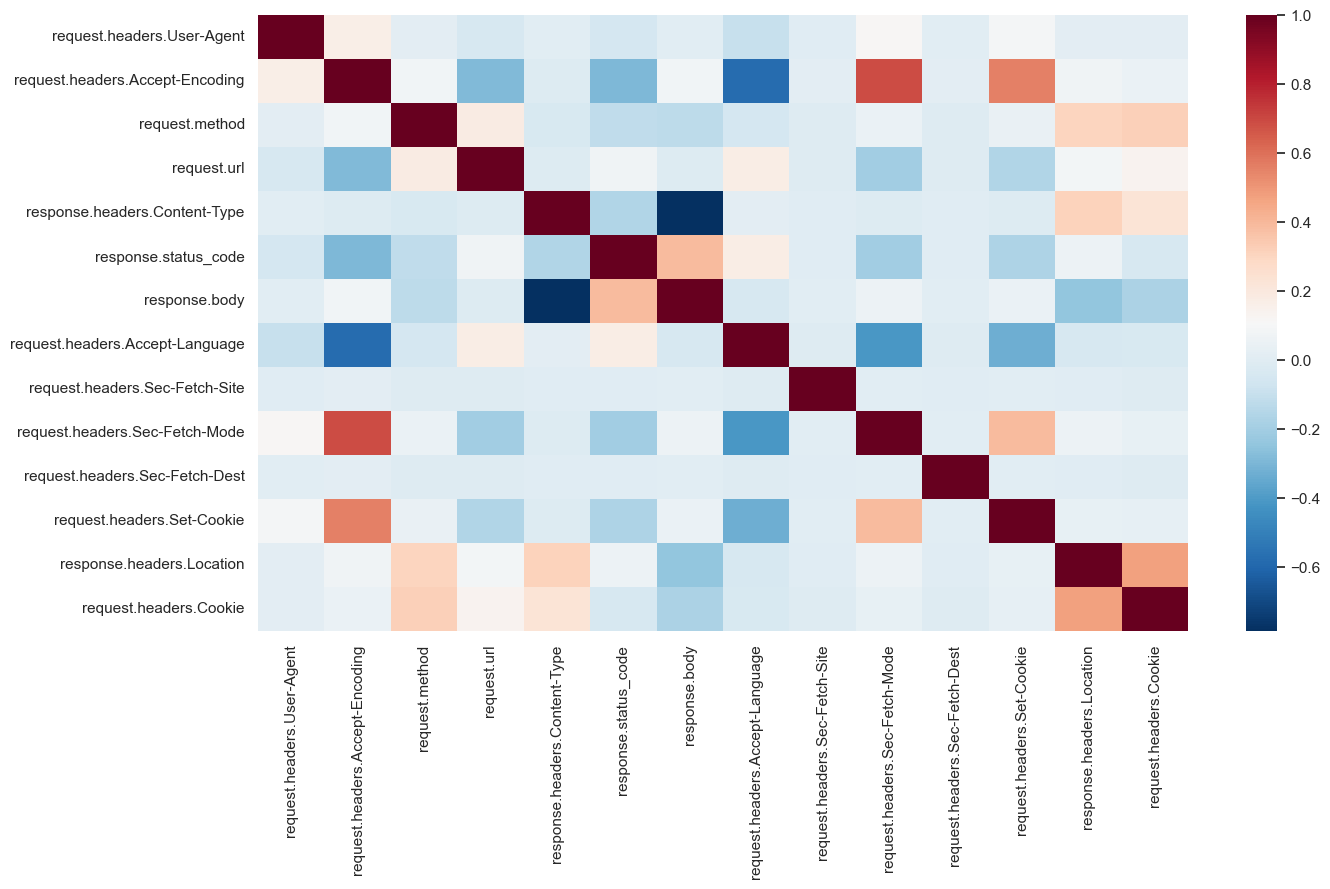

In [66]:
corr = df.corr()

# Create a heatmap of the correlations
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')

In [67]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.method', 'request.url', 'response.headers.Content-Type', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'response.headers.Location', 'request.headers.Cookie']


request.headers.User-Agent         float64
request.headers.Accept-Encoding    float64
request.method                       int32
request.url                        float64
response.headers.Content-Type        int32
response.headers.Content-Length     object
response.status_code                 int64
response.body                      float64
request.headers.Accept-Language      int32
request.headers.Sec-Fetch-Site     float64
request.headers.Sec-Fetch-Mode       int32
request.headers.Sec-Fetch-Dest     float64
request.headers.Set-Cookie         float64
response.headers.Location          float64
request.headers.Cookie             float64
attack_type                         object
label                               object
dtype: object

## Train test split

In [68]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(118995, 15) (118995,)
(25505, 15) (25505,)


Counter({'Benign': 128384, 'Malware': 16116})

## Model choosing and fitting

In [69]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('Benign', 105724), ('Malware', 13271)]


## Result printout

              precision    recall  f1-score   support

      Benign    0.97525   0.98945   0.98230     22660
     Malware    0.90497   0.80000   0.84925      2845

    accuracy                        0.96832     25505
   macro avg    0.94011   0.89473   0.91578     25505
weighted avg    0.96741   0.96832   0.96746     25505



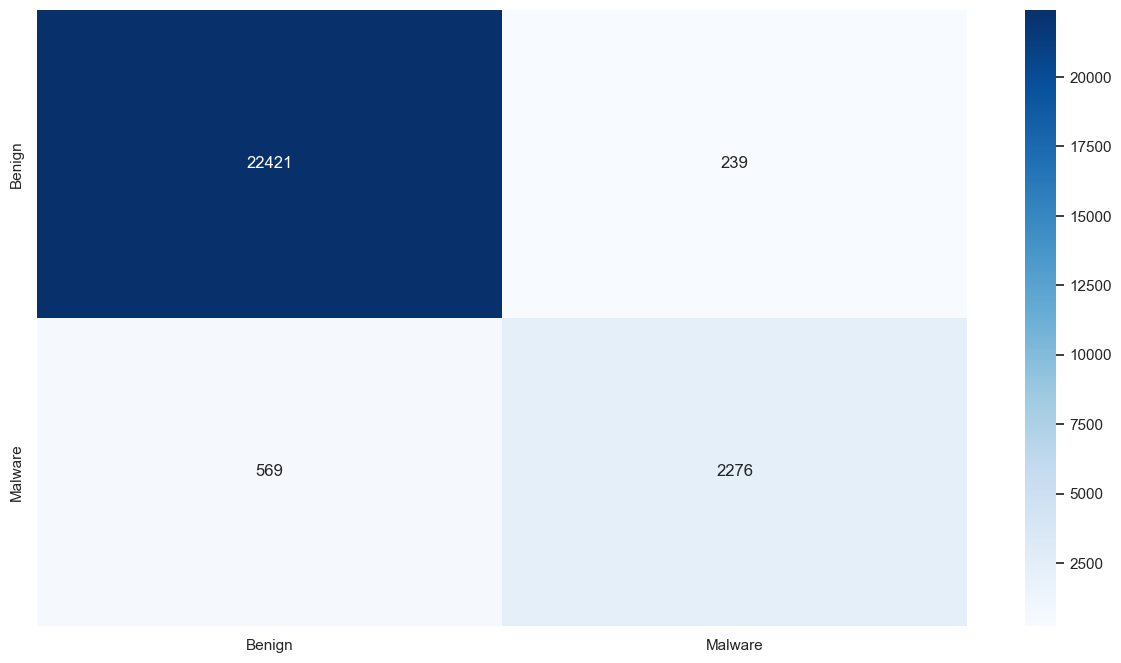

In [70]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

# Test

In [71]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./datasets/dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
predictions = clf.predict(X)

# Save your predictions

In [72]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')